### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Syntehtic Minority Oversampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In case of normal upsampling, on top of the existing minority data, more data points get added. We are basically increasing the similar data points again and again in the same place till they are equal to the number of data points in the majority class. 
The drawback of this technique is that the data is still near to that position. Variance is not increasing at all.

In order to increase the variance, interpolating techniques are used.   
Interpolating means we are creating our own synthetic data.  

What SMOTE does is it picks up a minority data point, then it tries to join the two nearest point and then it adds the new data points across that line.    
Like this, additional data would be created.    

In [11]:
from sklearn.datasets import make_classification

In [12]:
x,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state = 12, n_redundant=0)
# 1000 data points
# 2 features
# 1 cluster per class
# One class should be 90% more than the other class with respect to the output feature. Hence this creates an imbalanced dataset.
# Random state is for the seed
# We do not want to use n_reduntant feature as of now

## We are getting the input features and then the target feature
## x is independent feature and y is dependent feature

In [13]:
import pandas as pd
df1 = pd.DataFrame(x, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1,df2], axis=1) # axis = 1 means column wise

In [14]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [15]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

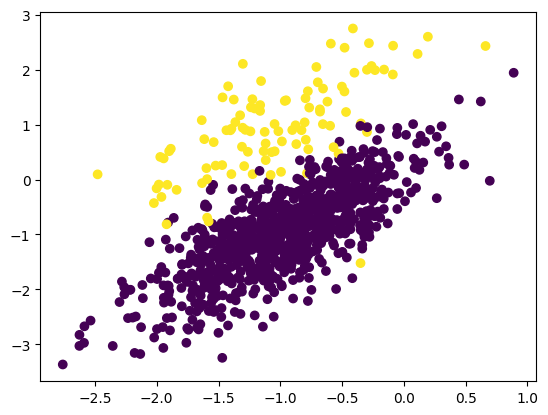

In [16]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [17]:
## TO use SMOTE, we need to install the following library
!pip install imblearn

In [18]:
import imblearn
print(imblearn.__version__)

0.13.0


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
## Transform the dataset using SMOTE
## Internally the library would be responsible for connecting all the dots and interpolating new points.
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target']) #Indepedent feature followed by dependent feature

In [21]:
x.shape

(1800, 2)

In [22]:
y.shape

(1800,)

In [ ]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [27]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [28]:
len(y[y==0])

900

In [29]:
len(y[y==1])

900

In [30]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversampled_df = pd.concat([df1,df2],axis=1)

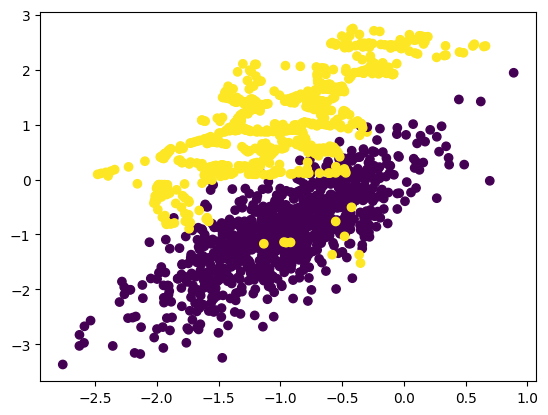

In [31]:
plt.scatter(oversampled_df['f1'], oversampled_df['f2'], c=oversampled_df['target'])

In [32]:
## We can then apply a machine learning algorithm and solve a classification problem based on the upsampled dataset